In [85]:
import tracking_kline as tk

In [86]:
kline = tk.kuc_collect_multi_kline("BTC-USDT", "hour", 1, 10)
#print(kline) 
kline = tk.change_to_datetime(kline)
kline.head()
#kline.plot()
highs_and_lows = kline[["high", "low", "volume"]]

In [87]:
highs_and_lows

,high,low,volume
time,,,
2023-09-28 21:00:00,27110.1,27000.1,61.348762
2023-09-28 22:00:00,27082.7,26872.2,207.178113
2023-09-28 23:00:00,26960.7,26887.0,44.949803
2023-09-29 00:00:00,26970.4,26900.3,30.120406
2023-09-29 01:00:00,26978.9,26955.0,79.948366
...,...,...,...
2024-11-18 16:00:00,91967.5,91142.7,269.329762
2024-11-18 17:00:00,91453.9,90960.0,69.216972
2024-11-18 18:00:00,91218.2,90234.7,126.084701


In [88]:
kline

,open,close,high,low,volume,turnover
time,,,,,,
2023-09-28 21:00:00,27067.7,27042.7,27110.1,27000.1,61.348762,1.659376e+06
2023-09-28 22:00:00,27042.7,26897.7,27082.7,26872.2,207.178113,5.584800e+06
2023-09-28 23:00:00,26896.1,26957.2,26960.7,26887.0,44.949803,1.210294e+06
2023-09-29 00:00:00,26957.2,26970.4,26970.4,26900.3,30.120406,8.114186e+05
2023-09-29 01:00:00,26970.5,26978.5,26978.9,26955.0,79.948366,2.156611e+06
...,...,...,...,...,...,...
2024-11-18 16:00:00,91477.5,91301.6,91967.5,91142.7,269.329762,2.469485e+07
2024-11-18 17:00:00,91285.4,91157.5,91453.9,90960.0,69.216972,6.313600e+06
2024-11-18 18:00:00,91157.6,90465.7,91218.2,90234.7,126.084701,1.142536e+07


<Axes: xlabel='time'>

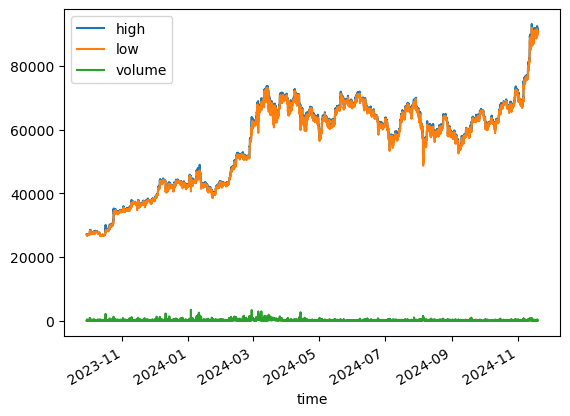

In [89]:
highs_and_lows.plot()


In [90]:
highs_and_lows["High Percent Change"] = highs_and_lows["high"].pct_change(24)
highs_and_lows["Low Percent Change"] = highs_and_lows["low"].pct_change(24)
highs_and_lows["Volume Percent Change"] = highs_and_lows["volume"].pct_change(24)

/var/folders/pj/jdskm1bs0_x8fw9_10jkytb00000gn/T/ipykernel_53929/1631046923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highs_and_lows["High Percent Change"] = highs_and_lows["high"].pct_change(24)
/var/folders/pj/jdskm1bs0_x8fw9_10jkytb00000gn/T/ipykernel_53929/1631046923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highs_and_lows["Low Percent Change"] = highs_and_lows["low"].pct_change(24)


In [91]:
highs_and_lows.corr()["Volume Percent Change"]

high                    -0.019964
low                     -0.030193
volume                   0.468199
High Percent Change      0.058072
Low Percent Change      -0.088846
Volume Percent Change    1.000000
Name: Volume Percent Change, dtype: float64

          mean    median
time                    
1     0.720465  0.024739
2     0.585018  0.022840
3     0.407882 -0.117815
4     0.473004  0.017872
5     0.352305 -0.060266
6     0.917659 -0.029108
7     0.447670  0.045568
8     0.542195 -0.061230
9     0.550343  0.004374
10    0.686222 -0.039727
11    0.520870 -0.002056
12    0.786113  0.001034


<Axes: xlabel='time'>

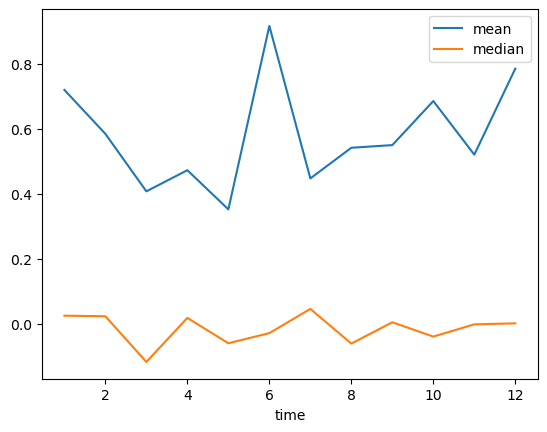

In [92]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

          mean    median
time                    
1     0.000601  0.001467
2     0.013046  0.005429
3     0.004934  0.006313
4    -0.004507  0.000443
5     0.003803  0.001521
6    -0.002894 -0.000154
7     0.002206  0.001881
8    -0.002645 -0.000784
9     0.002773  0.002431
10    0.005880  0.002590
11    0.007394  0.004003
12    0.004032  0.001657


<Axes: xlabel='time'>

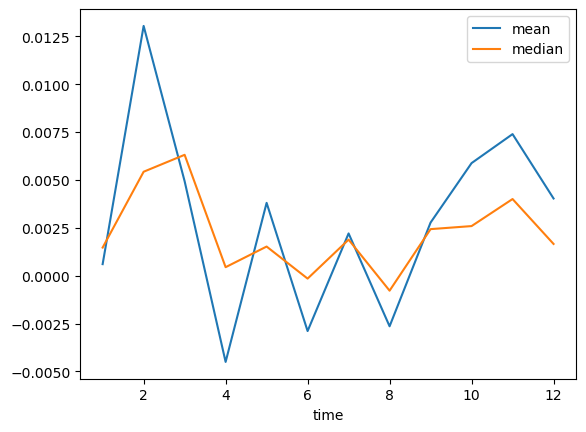

In [107]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["Low Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

          mean    median
time                    
1     0.000669  0.000688
2     0.013278  0.004349
3     0.004550  0.004940
4    -0.004350 -0.000560
5     0.003620  0.000949
6    -0.002900 -0.001306
7     0.002258  0.001368
8    -0.002950 -0.001797
9     0.002766  0.001903
10    0.005979  0.001914
11    0.007475  0.002997
12    0.004062  0.000654


<Axes: xlabel='time'>

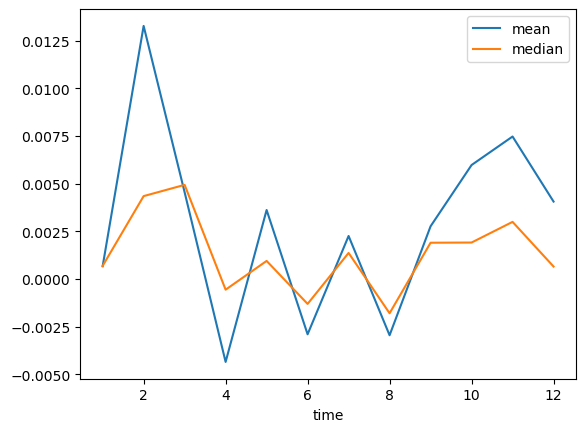

In [108]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

          mean    median
time                    
2023  0.671827 -0.015870
2024  0.562689 -0.022583


<Axes: xlabel='time'>

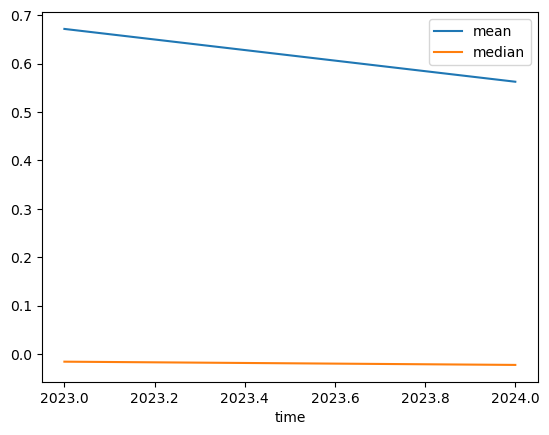

In [93]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.year]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

               mean    median
time time                    
2023 9    -0.265322 -0.454440
     10    0.805411 -0.026731
     11    0.450996  0.002677
     12    0.786113  0.001034
2024 1     0.720465  0.024739
     2     0.585018  0.022840
     3     0.407882 -0.117815
     4     0.473004  0.017872
     5     0.352305 -0.060266
     6     0.917659 -0.029108
     7     0.447670  0.045568
     8     0.542195 -0.061230
     9     0.580930  0.015228
     10    0.566874 -0.049780
     11    0.637868 -0.009745


<Axes: xlabel='time,time'>

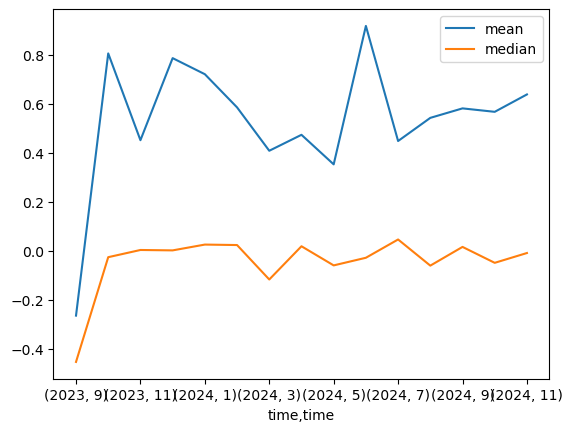

In [94]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.year, highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

In [95]:
correlation = kline[["high", "low", "volume"]].corr()
correlation

,high,low,volume
high,1.000000,0.999702,0.040952
low,0.999702,1.000000,0.022250
volume,0.040952,0.022250,1.000000


<Axes: >

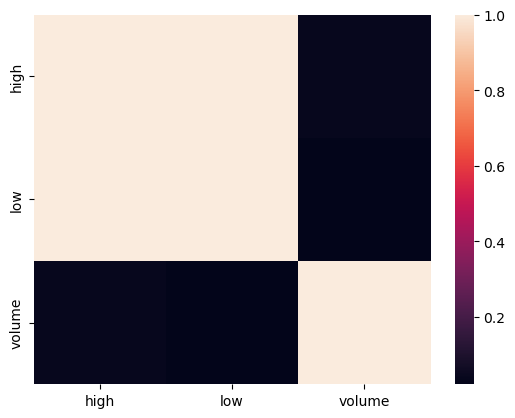

In [96]:
import seaborn as sns
sns.heatmap(correlation)


In [97]:
kline

,open,close,high,low,volume,turnover
time,,,,,,
2023-09-28 21:00:00,27067.7,27042.7,27110.1,27000.1,61.348762,1.659376e+06
2023-09-28 22:00:00,27042.7,26897.7,27082.7,26872.2,207.178113,5.584800e+06
2023-09-28 23:00:00,26896.1,26957.2,26960.7,26887.0,44.949803,1.210294e+06
2023-09-29 00:00:00,26957.2,26970.4,26970.4,26900.3,30.120406,8.114186e+05
2023-09-29 01:00:00,26970.5,26978.5,26978.9,26955.0,79.948366,2.156611e+06
...,...,...,...,...,...,...
2024-11-18 16:00:00,91477.5,91301.6,91967.5,91142.7,269.329762,2.469485e+07
2024-11-18 17:00:00,91285.4,91157.5,91453.9,90960.0,69.216972,6.313600e+06
2024-11-18 18:00:00,91157.6,90465.7,91218.2,90234.7,126.084701,1.142536e+07


In [98]:
kline.groupby("time").agg({"high":"mean"})

,high
time,
2023-09-28 21:00:00,27110.1
2023-09-28 22:00:00,27082.7
2023-09-28 23:00:00,26960.7
2023-09-29 00:00:00,26970.4
2023-09-29 01:00:00,26978.9
...,...
2024-11-18 16:00:00,91967.5
2024-11-18 17:00:00,91453.9
2024-11-18 18:00:00,91218.2


<Axes: xlabel='time,time'>

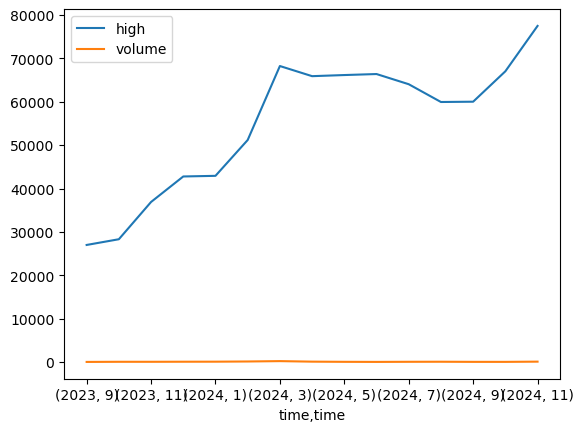

In [99]:
kline[["high", "volume"]].groupby(by=[kline.index.year, kline.index.month]).median().plot()


<Axes: xlabel='time,time'>

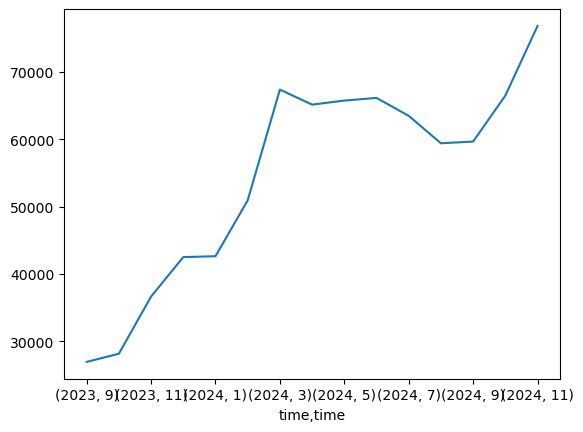

In [100]:
kline["low"].groupby(by=[kline.index.year, kline.index.month]).median().plot()


<Axes: xlabel='time,time'>

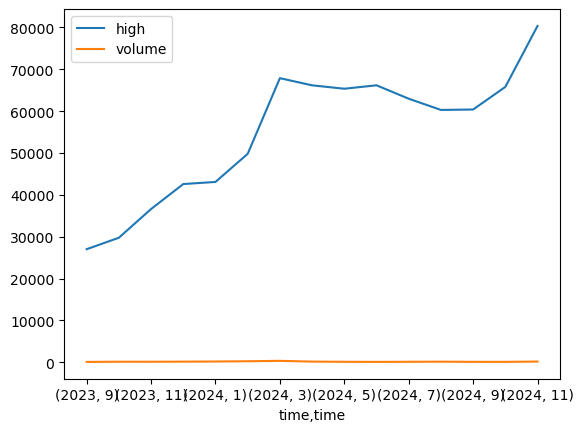

In [101]:
kline[["high", "volume"]].groupby(by=[kline.index.year, kline.index.month]).mean().plot()

<Axes: xlabel='time'>

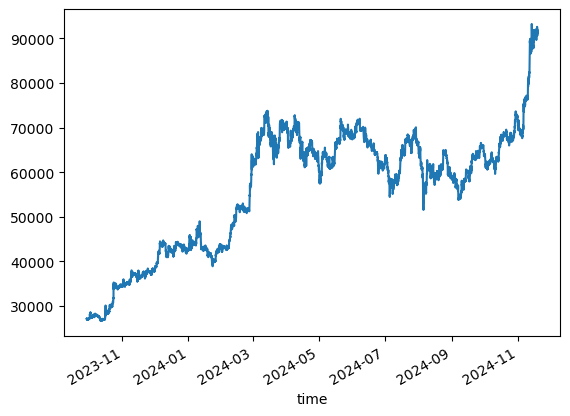

In [106]:
kline.high.plot()

<Axes: xlabel='time'>

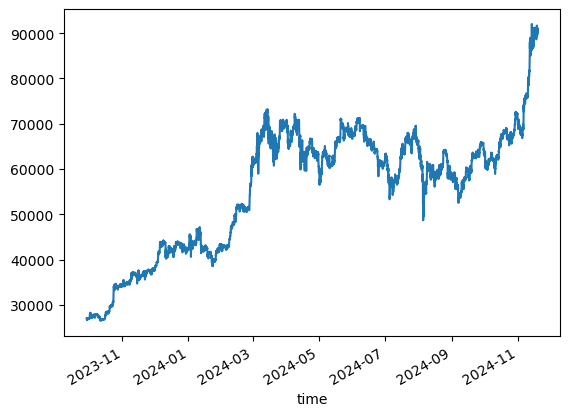

In [105]:
kline.low.plot()

<Axes: xlabel='time'>

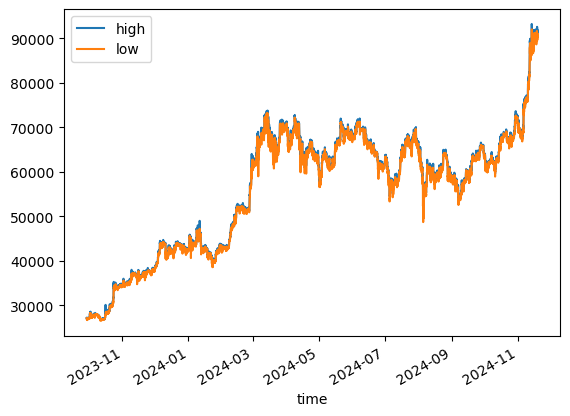

In [104]:
kline[["high", "low"]].plot()